In [1]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
import seaborn as sns
#import pyfolio
import datetime
%matplotlib inline

In [20]:
# Extract columns from dataframe
'''
# EURUSD
df_cur1 = pd.read_csv('data/2012-2017_ECH_M15.csv')
cur1_col1 = df_cur1.iloc[:, 4].values
cur1_index = df_cur1.iloc[:, 0].values
cur1_volume = df_cur1.iloc[:, 5].values
# EURCAD
df_cur2 = pd.read_csv('data/2012-2017_EC_M15.csv')
cur2_col1 = df_cur2.iloc[:, 4].values
cur2_index = df_cur2.iloc[:, 0].values
cur2_volume = df_cur2.iloc[:, 5].values
# EURAUD
df_cur3 = pd.read_csv('data/2012-2017_EA_M15.csv')
cur3_col1 = df_cur3.iloc[:, 4].values
cur3_index = df_cur3.iloc[:, 0].values
cur3_volume = df_cur3.iloc[:, 5].values
# EURCHF
df_cur4 = pd.read_csv('data/2012-2017_ECH_M15.csv')
cur4_col1 = df_cur4.iloc[:, 4].values
cur4_index = df_cur4.iloc[:, 0].values
cur4_volume = df_cur4.iloc[:, 5].values
# EURGBP
df_cur5 = pd.read_csv('data/2012-2017_EG_M15.csv')
cur5_col1 = df_cur5.iloc[:, 4].values
cur5_index = df_cur5.iloc[:, 0].values
cur5_volume = df_cur5.iloc[:, 5].values
'''

def load_symbol(filename):
    df_cur = pd.read_csv(filename)
    cur_col1 = df_cur.iloc[:, 4].values
    cur_index = df_cur.iloc[:, 0].values
    cur_volume = df_cur.iloc[:, 5].values
    
    return cur_col1, cur_index, cur_volume

cur1_col1, cur1_index, cur1_volume = load_symbol('data/2012-2017_EA_M15.csv')
cur2_col1, cur2_index, cur2_volume = load_symbol('data/2012-2017_EC_M15.csv')
cur3_col1, cur3_index, cur3_volume = load_symbol('data/2012-2017_EU_M15.csv')
cur4_col1, cur4_index, cur4_volume = load_symbol('data/2012-2017_ECH_M15.csv')
cur5_col1, cur5_index, cur5_volume = load_symbol('data/2012-2017_EG_M15.csv')

def drop_zeros(cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1):
# Drops weekend values (volume == 0)
# Assumes equal shape of all currency symbol data
    jj = 0
    for j in range(len(cur1_col1)):
        if cur1_volume[j] > 0:
            cur1_col1[jj] = cur1_col1[j]
            cur2_col1[jj] = cur2_col1[j]
            cur3_col1[jj] = cur3_col1[j]
            cur4_col1[jj] = cur4_col1[j]
            cur5_col1[jj] = cur5_col1[j]
            jj += 1

    cur1_col1 = cur1_col1[:jj]
    cur2_col1 = cur2_col1[:jj]
    cur3_col1 = cur3_col1[:jj]
    cur4_col1 = cur4_col1[:jj]
    cur5_col1 = cur5_col1[:jj]
    
    return cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1

cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1 = drop_zeros(cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1)

NameError: name 'cur2_ratio' is not defined

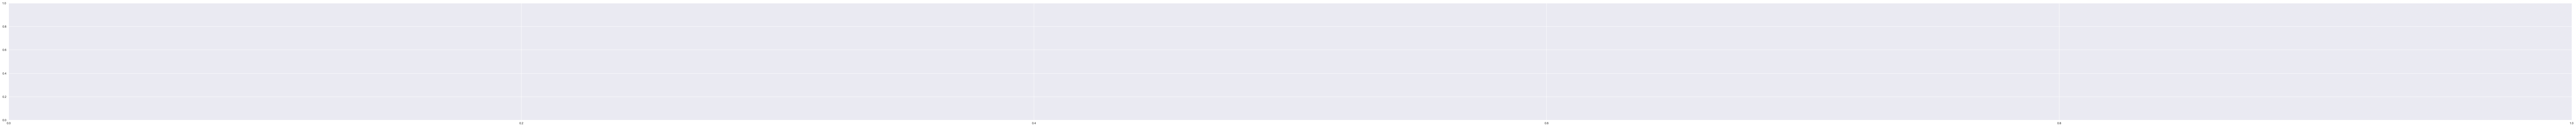

In [3]:
# Creates averaged ratios for all symbols
# Not necessary for backtest

fig = plt.figure(figsize = (150, 7))
ax = fig.add_subplot(111)

# Param
ma_period = 150
ax_period = 30

ratio_avg = [(cur1_ratio[i] + cur2_ratio[i] + cur3_ratio[i] + cur4_ratio[i] + cur5_ratio[i])/5 for i in range(len(cur2_ratio))]

cur1_avg_delta = [cur1_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur2_avg_delta = [cur2_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur3_avg_delta = [cur3_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur4_avg_delta = [cur4_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur5_avg_delta = [cur5_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]

cur1_avg_delta_ma = [0]*len(cur1_avg_delta)
cur2_avg_delta_ma = [0]*len(cur2_avg_delta)
cur3_avg_delta_ma = [0]*len(cur3_avg_delta)
cur4_avg_delta_ma = [0]*len(cur4_avg_delta)
cur5_avg_delta_ma = [0]*len(cur5_avg_delta)

for i in range(ma_period, len(cur1_avg_delta_ma)):
    cur1_avg_delta_ma[i] = sum(cur1_avg_delta[i-ma_period:i])/ma_period
    cur2_avg_delta_ma[i] = sum(cur2_avg_delta[i-ma_period:i])/ma_period
    cur3_avg_delta_ma[i] = sum(cur3_avg_delta[i-ma_period:i])/ma_period
    cur4_avg_delta_ma[i] = sum(cur4_avg_delta[i-ma_period:i])/ma_period
    cur5_avg_delta_ma[i] = sum(cur5_avg_delta[i-ma_period:i])/ma_period

cur1_avg_delta_ma_ax = [0]*len(cur1_avg_delta_ma)
for i in range(ax_period, len(cur1_avg_delta_ma_ax)):
    cur1_avg_delta_ma_ax[i] = (cur1_avg_delta_ma[i] - cur1_avg_delta_ma[i-ax_period])/ax_period

    
a = plt.figure(figsize=(150, 8))
b = a.add_subplot(111)
b.plot(cur1_avg_delta_ma)
b.plot(cur2_avg_delta_ma)
b.plot(cur3_avg_delta_ma)
b.plot(cur4_avg_delta_ma)
b.plot(cur5_avg_delta_ma)
plt.show()

'''
# prevent shift
for i in range(ma_period):
    cur1_avg_delta_ma.insert(i, cur1_avg_delta[i])

print(len(cur1_avg_delta))
print(len(cur1_avg_delta_ma))

ax.twinx().plot(cur1_col1[samplesize+1:len(cur2_ratio)+samplesize-1], '#afafaf')
ax.plot(cur1_avg_delta[:len(cur2_ratio)])
ax.plot(cur1_avg_delta_ma)
ax.plot([0]*len(cur2_ratio))
ax.locator_params(nbins=40)
plt.figure(figsize=(150, 6)).add_subplot(212).plot(cur1_avg_delta_ma_ax)
plt.plot([0]*len(cur1_avg_delta_ma_ax))
#ax.plot(ratio_avg, 'r--')
plt.savefig('EU_ratio_avg.pdf')
'''

In [4]:
# Visualization

print(len(cur1_col1))
print(len(cur2_col1))
print(len(cur3_col1))
print(len(cur4_col1))
print(len(cur5_col1), '\n')

print(len(cur1_localmax))
print(len(cur1_avg_delta_ma_ax))
print(len(cur1_avg_delta_ma), '\n')

print(len(cur2_col1)-len(cur1_avg_delta_ma))

# Still does not explain the extra 568 shift
#--

fifi = plt.figure(figsize=(50, 5))
aa = fifi.add_subplot(111)
aa.plot(cur1_col1[samplesize:1000+samplesize], '#aaaaaa')
aa.plot(cur1_localmax[:1000], '#bbbbbb')
aa.plot(cur1_localmin[:1000], '#bbbbbb')

bb = aa.twinx()
bb.plot(cur1_ratio[:1000], 'c')
bb.plot(cur1_avg_delta[:1000], 'r')
bb.plot(cur1_avg_delta_ma[:1000], 'g')
bb.twinx().plot(cur1_avg_delta_ma_ax[:1000], 'b')
bb.plot([0]*1000)
print(cur1_avg_delta_ma_ax[140:170])


124772
124772
124772
124772
124772 



NameError: name 'cur1_localmax' is not defined

In [22]:
# Some functions
# -- 

def get_avg_delta_ma_ax(ma_period, ax_period, cur1_ratio, cur2_ratio, cur3_ratio, cur4_ratio, cur5_ratio):
    ratio_avg = [(cur1_ratio[i] + cur2_ratio[i] + cur3_ratio[i] + cur4_ratio[i] + cur5_ratio[i])/5 for i in range(len(cur2_ratio))]
    cur1_avg_delta = [cur1_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
    cur1_avg_delta_ma = [0]*len(cur1_avg_delta)

    for i in range(ma_period, len(cur1_avg_delta_ma)):
        cur1_avg_delta_ma[i] = sum(cur1_avg_delta[i-ma_period:i])/ma_period

    cur1_avg_delta_ma_ax = [0]*len(cur1_avg_delta_ma)
    for i in range(ax_period, len(cur1_avg_delta_ma_ax)):
        cur1_avg_delta_ma_ax[i] = (cur1_avg_delta_ma[i] - cur1_avg_delta_ma[i-ax_period])/ax_period
    
    return cur1_avg_delta_ma_ax

def record_open_data(type_, open_rates, entryvals, typevals, x, cur1_col1): # 0 or 1
    tradetype = type_
    trade = 1 # Keeping track of both trades simultaneously, also allows different stops/targets
    open_rates[0] = cur1_col1[x+samplesize]

    # Trades = open
    entryvals.append(x) #entryvals[ev] = x # Store position in delta array
    typevals.append(type_) # For line coloring in backtest visualization

    return trade, tradetype, open_rates, entryvals, typevals

def record_close_data(typeval, exitvals, net_pips_1, x, cur1_col1):
    if typeval == 0:
        net_pips_1.append(net_pips_1[-1] + math.ceil((cur1_col1[samplesize+x] - open_rates[0])*10000))
        #net_pips_1.append(net_pips_1[-1] + math.ceil((open_rates[0] - cur1_col1[samplesize+x])*10000))
    else:
        net_pips_1.append(net_pips_1[-1] + math.ceil((open_rates[0] - cur1_col1[samplesize+x])*10000))
        #net_pips_1.append(net_pips_1[-1] + math.ceil((cur1_col1[samplesize+x] - open_rates[0])*10000))
        
    trade = 0
    exitvals.append(x)
    
    return net_pips_1, trade, exitvals

def create_ratios(samplesize, cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1):
    # Array initializations
    cur1_ratio, cur2_ratio, cur3_ratio, cur4_ratio, cur5_ratio = ([] for i in range(5))
    cur1_localmax, cur2_localmax, cur3_localmax, cur4_localmax, cur5_localmax = ([] for i in range(5))
    cur1_localmin, cur2_localmin, cur3_localmin, cur4_localmin, cur5_localmin = ([] for i in range(5))

    # Speed measuring
    ping = time.process_time()

    # First calc
    cur1_localmax.insert(0, float(max(cur1_col1[:samplesize])))
    cur2_localmax.insert(0, float(max(cur2_col1[:samplesize])))
    cur3_localmax.insert(0, float(max(cur3_col1[:samplesize])))
    cur4_localmax.insert(0, float(max(cur4_col1[:samplesize])))
    cur5_localmax.insert(0, float(max(cur5_col1[:samplesize])))

    cur1_localmin.insert(0, float(min(cur1_col1[:samplesize])))
    cur2_localmin.insert(0, float(min(cur2_col1[:samplesize])))
    cur3_localmin.insert(0, float(min(cur3_col1[:samplesize])))
    cur4_localmin.insert(0, float(min(cur4_col1[:samplesize])))
    cur5_localmin.insert(0, float(min(cur5_col1[:samplesize])))

    for i in range(samplesize, len(cur1_col1)):
        # Get localmaxes and localmins respectively from extracted datasets

        # Array boundary precausions
        if i > 0: 
            # Cur1 max
            if cur1_col1[i] > cur1_localmax[i-samplesize-1]:
                cur1_localmax.insert(i-samplesize, cur1_col1[i])
            elif cur1_localmax[i-samplesize-1] == cur1_col1[i-samplesize-1]:
                cur1_localmax.insert(i-samplesize, float(max(cur1_col1[i-samplesize:i])))
            else:
                cur1_localmax.insert(i-samplesize, cur1_localmax[i-samplesize-1])

            # Cur2 max
            if cur2_col1[i] > cur2_localmax[i-samplesize-1]:
                cur2_localmax.insert(i-samplesize, cur2_col1[i])
            elif cur2_localmax[i-samplesize-1] == cur2_col1[i-samplesize-1]:
                cur2_localmax.insert(i-samplesize, float(max(cur2_col1[i-samplesize:i])))
            else:
                cur2_localmax.insert(i-samplesize, cur2_localmax[i-samplesize-1])

            # Cur3 max
            if cur3_col1[i] > cur3_localmax[i-samplesize-1]:
                cur3_localmax.insert(i-samplesize, cur3_col1[i])
            elif cur3_localmax[i-samplesize-1] == cur3_col1[i-samplesize-1]:
                cur3_localmax.insert(i-samplesize, float(max(cur3_col1[i-samplesize:i])))
            else:
                cur3_localmax.insert(i-samplesize, cur3_localmax[i-samplesize-1])

            # Cur4 max
            if cur4_col1[i] > cur4_localmax[i-samplesize-1]:
                cur4_localmax.insert(i-samplesize, cur4_col1[i])
            elif cur4_localmax[i-samplesize-1] == cur4_col1[i-samplesize-1]:
                cur4_localmax.insert(i-samplesize, float(max(cur4_col1[i-samplesize:i])))
            else:
                cur4_localmax.insert(i-samplesize, cur4_localmax[i-samplesize-1])

            # Cur5 max
            if cur5_col1[i] > cur5_localmax[i-samplesize-1]:
                cur5_localmax.insert(i-samplesize, cur5_col1[i])
            elif cur5_localmax[i-samplesize-1] == cur5_col1[i-samplesize-1]:
                cur5_localmax.insert(i-samplesize, float(max(cur5_col1[i-samplesize:i])))
            else:
                cur5_localmax.insert(i-samplesize, cur5_localmax[i-samplesize-1])


            # Cur1 min
            if cur1_col1[i] < cur1_localmin[i-samplesize-1]:
                cur1_localmin.insert(i-samplesize, cur1_col1[i])
            elif cur1_localmin[i-samplesize-1] == cur1_col1[i-samplesize-1]:
                cur1_localmin.insert(i-samplesize, float(min(cur1_col1[i-samplesize:i])))
            else:
                cur1_localmin.insert(i-samplesize, cur1_localmin[i-samplesize-1])

            # Cur2 min
            if cur2_col1[i] < cur2_localmin[i-samplesize-1]:
                cur2_localmin.insert(i-samplesize, cur2_col1[i])
            elif cur2_localmin[i-samplesize-1] == cur2_col1[i-samplesize-1]:
                cur2_localmin.insert(i-samplesize, float(min(cur2_col1[i-samplesize:i])))
            else:
                cur2_localmin.insert(i-samplesize, cur2_localmin[i-samplesize-1])

            # Cur3 min
            if cur3_col1[i] < cur3_localmin[i-samplesize-1]:
                cur3_localmin.insert(i-samplesize, cur3_col1[i])
            elif cur3_localmin[i-samplesize-1] == cur3_col1[i-samplesize-1]:
                cur3_localmin.insert(i-samplesize, float(min(cur3_col1[i-samplesize:i])))
            else:
                cur3_localmin.insert(i-samplesize, cur3_localmin[i-samplesize-1])

            # Cur4 min
            if cur4_col1[i] < cur4_localmin[i-samplesize-1]:
                cur4_localmin.insert(i-samplesize, cur4_col1[i])
            elif cur4_localmin[i-samplesize-1] == cur4_col1[i-samplesize-1]:
                cur4_localmin.insert(i-samplesize, float(min(cur4_col1[i-samplesize:i])))
            else:
                cur4_localmin.insert(i-samplesize, cur4_localmin[i-samplesize-1])

            # Cur5 min
            if cur5_col1[i] < cur5_localmin[i-samplesize-1]:
                cur5_localmin.insert(i-samplesize, cur5_col1[i])
            elif cur5_localmin[i-samplesize-1] == cur5_col1[i-samplesize-1]:
                cur5_localmin.insert(i-samplesize, float(min(cur5_col1[i-samplesize:i])))
            else:
                cur5_localmin.insert(i-samplesize, cur5_localmin[i-samplesize-1])


            # Calculate ratios
            r_1 = (cur1_col1[i] - cur1_localmin[i-samplesize-1])/(cur1_localmax[i-samplesize-1] - cur1_localmin[i-samplesize-1])
            r_2 = (cur2_col1[i] - cur2_localmin[i-samplesize-1])/(cur2_localmax[i-samplesize-1] - cur2_localmin[i-samplesize-1])
            r_3 = (cur3_col1[i] - cur3_localmin[i-samplesize-1])/(cur3_localmax[i-samplesize-1] - cur3_localmin[i-samplesize-1])
            r_4 = (cur4_col1[i] - cur4_localmin[i-samplesize-1])/(cur4_localmax[i-samplesize-1] - cur4_localmin[i-samplesize-1])
            r_5 = (cur5_col1[i] - cur5_localmin[i-samplesize-1])/(cur5_localmax[i-samplesize-1] - cur5_localmin[i-samplesize-1])

            # Prevent o_r !E {[0,1]}
            if r_1 > 1:
                cur1_ratio.insert(i-samplesize, 1)
            elif r_1 < 0:
                cur1_ratio.insert(i-samplesize, 0)
            else:
                cur1_ratio.insert(i-samplesize, r_1)

            if r_2 > 1:
                cur1_ratio.insert(i-samplesize, 1)
            elif r_2 < 0:
                cur2_ratio.insert(i-samplesize, 0)
            else:
                cur2_ratio.insert(i-samplesize, r_2)

            if r_3 > 1:
                cur3_ratio.insert(i-samplesize, 1)
            elif r_3 < 0:
                cur3_ratio.insert(i-samplesize, 0)
            else:
                cur3_ratio.insert(i-samplesize, r_3)

            if r_4 > 1:
                cur4_ratio.insert(i-samplesize, 1)
            elif r_4 < 0:
                cur4_ratio.insert(i-samplesize, 0)
            else:
                cur4_ratio.insert(i-samplesize, r_4)

            if r_5 > 1:
                cur5_ratio.insert(i-samplesize, 1)
            elif r_5 < 0:
                cur5_ratio.insert(i-samplesize, 0)
            else:
                cur5_ratio.insert(i-samplesize, r_5)


            # Simple progress bar
            if i % (math.floor((len(cur1_col1)-1-samplesize)/10)) == 0:
                print('+ '*math.ceil(((len(cur1_col1)-1-samplesize)/10/i)**-1),
                      '- '*(10-math.ceil(((len(cur1_col1)-1-samplesize)/10/i)**-1)), sep='')

    # Print elapsed time
    pong = time.process_time()
    print(pong-ping, 'seconds elapsed')
    
    return (cur1_ratio, cur2_ratio, cur3_ratio, cur4_ratio, cur5_ratio, 
            cur1_localmax, cur2_localmax, cur3_localmax, cur4_localmax, cur5_localmax,
            cur1_localmin, cur2_localmin, cur3_localmin, cur4_localmin, cur5_localmin)

In [26]:
cur1_col1, cur1_index, cur1_volume = load_symbol('data/2012-2017_EU_M15.csv')
cur2_col1, cur2_index, cur2_volume = load_symbol('data/2012-2017_EC_M15.csv')
cur3_col1, cur3_index, cur3_volume = load_symbol('data/2012-2017_EA_M15.csv')
cur4_col1, cur4_index, cur4_volume = load_symbol('data/2012-2017_ECH_M15.csv')
cur5_col1, cur5_index, cur5_volume = load_symbol('data/2012-2017_EG_M15.csv')

cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1 = drop_zeros(cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1)

+ - - - - - - - - - 
+ + - - - - - - - - 
+ + + - - - - - - - 
+ + + + - - - - - - 
+ + + + + - - - - - 
+ + + + + + - - - - 
+ + + + + + + - - - 
+ + + + + + + + - - 
+ + + + + + + + + - 
+ + + + + + + + + + 
5.6875 seconds elapsed
final pip val: 2603


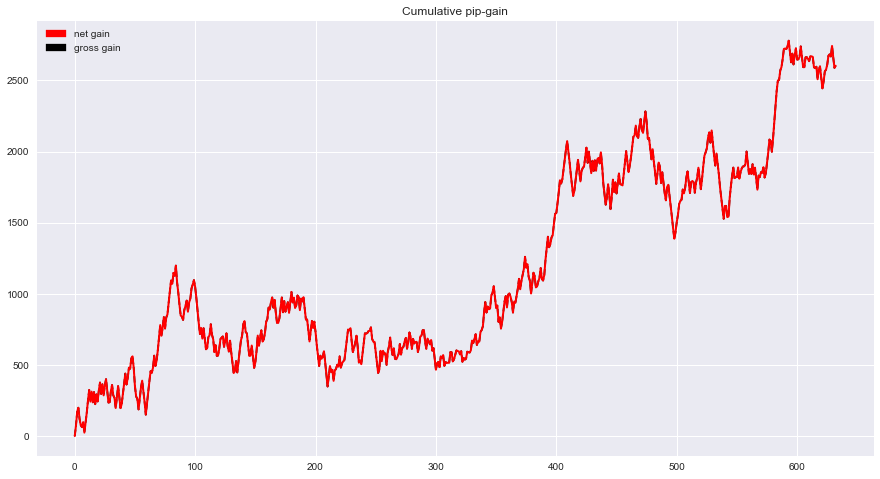

In [27]:
'''
Every array except for raw quotes are adjusted
shift cur1_col1 by samplesize when calculating
'''
trade = 0
entryvals = []
exitvals = []
typevals = []
net_pips_1 = [0]

# Optimization
pip_arr = [0]

# Params
class self():
    pass

self.ax_threshold = 0.0004
self.target = 0.007
self.stop = 0.007

self.ma_period = 700
self.ax_period = 45
self.samplesize = 200

optimize = 0
# --

samplesize = self.samplesize

for t in range(1):
    if optimize:
        samplesize += 100
        
    (cur1_ratio, cur2_ratio, cur3_ratio, cur4_ratio, cur5_ratio, 
    cur1_localmax, cur2_localmax, cur3_localmax, cur4_localmax, cur5_localmax,
    cur1_localmin, cur2_localmin, cur3_localmin, cur4_localmin, cur5_localmin) = create_ratios(samplesize, cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1)
    
    ma_period = self.ma_period

    for u in range(1):
        if optimize:
            ma_period += 100

        ax_period = self.ax_period

        for v in range(1):
            if optimize:
                ax_period += 10

            cur1_avg_delta_ma_ax = get_avg_delta_ma_ax(ma_period, ax_period, 
                                                   cur1_ratio, cur2_ratio, 
                                                   cur3_ratio, cur4_ratio, 
                                                   cur5_ratio)
            ax_threshold = self.ax_threshold

            for w in range(1):
                if optimize:
                    ax_threshold += 0.0001

                target = self.target
                stop = self.stop

                for z in range(1):
                    if optimize:
                        target += 0.0015
                        stop += 0.0015

                    trade = 0
                    entryvals = []
                    exitvals = []
                    typevals = []
                    open_rates = [0]*2
                    net_pips_1 = [0]

                    for x in range(len(cur1_avg_delta_ma_ax)):
                        # if all closed
                        if trade == 0:
                            # Buy (tradetype 1)
                            if cur1_avg_delta_ma_ax[x] >= ax_threshold:
                                trade, tradetype, open_rates, entryvals, typevals = record_open_data(1, open_rates,
                                                                                                     entryvals, typevals, 
                                                                                                     x, cur1_col1)

                            # Sell (tradetype 0)
                            elif cur1_avg_delta_ma_ax[x] <= -ax_threshold:
                                trade, tradetype, open_rates, entryvals, typevals = record_open_data(0, open_rates, 
                                                                                                     entryvals, typevals, 
                                                                                                     x, cur1_col1)

                        # if > 0 open
                        else: 
                            # Buy order
                            if tradetype: # == 1:
                                if (cur1_avg_delta_ma_ax[x] <= 0
                                   or cur1_col1[samplesize+x] >= open_rates[0] + target
                                   or cur1_col1[samplesize+x] <= open_rates[0] - stop):

                                    net_pips_1, trade, exitvals = record_close_data(tradetype, exitvals, 
                                                                                    net_pips_1, x, cur1_col1)

                            # Sell order
                            else:
                                if (cur1_avg_delta_ma_ax[x] >= 0
                                   or cur1_col1[samplesize+x] <= open_rates[0] - target
                                   or cur1_col1[samplesize+x] >= open_rates[0] + stop):

                                    net_pips_1, trade, exitvals = record_close_data(tradetype, exitvals, 
                                                                                    net_pips_1, x, cur1_col1)

                    net_pips_1 = [net_pips_1[i] - 2*i for i in range(len(net_pips_1))]
                    #pip_arr.append(net_pips_1[-1])

                    if optimize:
                        # Getting R^2 value
                        model = LinearRegression()
                        X = np.array([i for i in range(len(net_pips_1))]).reshape(-1, 1)
                        y = net_pips_1
                        model.fit(X, y)
                        r_squared = model.score(X, y)        
                        print('R^2: %.3f, pips: %.1f' % (r_squared, net_pips_1[-1]))

                        fig = plt.figure(figsize=(10, 5))
                        ccc = fig.add_subplot(111)
                        plt.plot(net_pips_1)
                        TITLENAME = 'R^2: %.4f, pips: %.1f, ax_threshold: %.5f, target: %.4f, stop: %.4f\nma_period: %.1f, ax_period: %.1f, samplesize: %.1f' % (r_squared, net_pips_1[-1], ax_threshold,
                                                                                                                                                                 target, stop, ma_period, 
                                                                                                                                                                 ax_period, samplesize)

                        # If score is negative e.g. loss, picture is assigned 'a' and sorted to the bottom of the file by OS.
                        if net_pips_1[-1] <= 0:
                            IMGNAME = 'data/bt_imgs/EURAUD_X2/min/net_%.2f_%.1f_%.3f.png' % ((-(net_pips_1[-1] + 2*len(net_pips_1)) - 2*len(net_pips_1)), net_pips_1[-1], r_squared)
                        else:
                            IMGNAME = 'data/bt_imgs/EURAUD_X2/max/net_%.2f_%.1f_%.3f.png' % (net_pips_1[-1]/(1-r_squared), net_pips_1[-1], r_squared)
                        plt.title(TITLENAME)
                        plt.savefig(IMGNAME)
                        plt.close(fig)

if optimize == 0:     
    plt.figure(figsize=(15, 8))
    plt.plot(net_pips_1, 'k--')
    #net_pips_1 = [net_pips_1[i] - 2*i for i in range(len(net_pips_1))]
    print('final pip val:', net_pips_1[-1])
    
    plt.plot(net_pips_1, linewidth=2.0, color='r')
    plt.title('Cumulative pip-gain')
    red_patch = mpatches.Patch(color='r', label='net gain')
    black_patch = mpatches.Patch(color='k', label='gross gain')
    plt.legend(handles=[red_patch, black_patch])


In [25]:
EURAUD_best = net_pips_1

In [28]:
EURUSD_best = net_pips_1

In [47]:
print(len(EURAUD_best))
print(len(EURUSD_best))
'''
EURAUD_best_ = EURAUD_best
for i in range(0, len(EURAUD_best), 2):
    EURAUD_best_.remove(i)

print(EURAUD_best_[:1000])
print(len(EURAUD_best_))
'''
EURUSD_best_ = EURUSD_best_[50:-1]
print(EURUSD_best_)

1410
1412
[121, 75, 63, 98, 24, 93, 165, 250, 324, 242, 312, 237, 309, 224, 293, 243, 320, 376, 295, 364, 286, 356, 400, 317, 235, 238, 313, 359, 286, 269, 197, 269, 351, 278, 196, 225, 295, 365, 439, 362, 408, 480, 473, 546, 560, 477, 350, 278, 261, 187, 263, 340, 389, 315, 241, 150, 229, 315, 385, 456, 445, 480, 565, 492, 530, 603, 692, 780, 705, 761, 836, 756, 833, 855, 938, 1017, 1093, 1070, 1147, 1127, 1198, 1081, 1008, 922, 847, 839, 816, 886, 915, 952, 874, 939, 966, 1038, 1065, 1096, 1049, 971, 879, 794, 717, 760, 685, 758, 684, 610, 619, 695, 708, 786, 712, 680, 590, 640, 563, 566, 611, 681, 692, 700, 627, 667, 722, 632, 594, 670, 587, 514, 443, 454, 527, 447, 524, 599, 670, 705, 786, 808, 731, 721, 637, 563, 565, 636, 561, 479, 518, 597, 706, 634, 694, 743, 664, 680, 726, 803, 823, 903, 889, 941, 974, 902, 957, 868, 796, 795, 828, 903, 974, 870, 949, 874, 909, 941, 866, 941, 1013, 939, 973, 900, 919, 988, 975, 885, 966, 946, 976, 894, 819, 819, 747, 665, 738, 809, 759, 804, 7

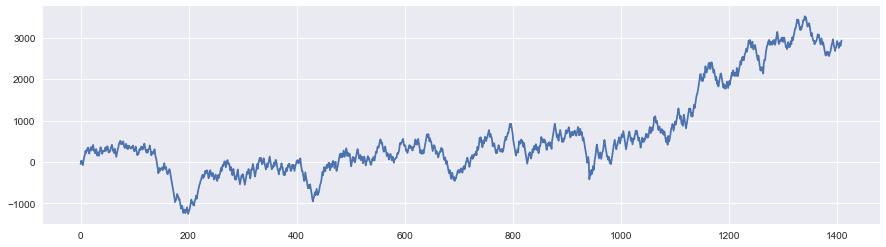

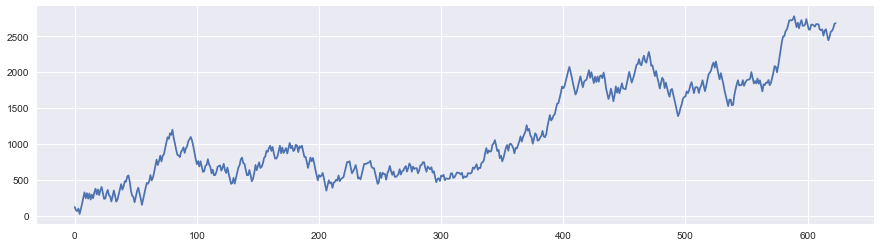

In [55]:
plt.figure(figsize=(15, 4))
plt.plot(EURAUD_best)
plt.show()
plt.figure(figsize=(15, 4))
plt.plot(EURUSD_best_)
plt.show()
#plt.figure(figsize=(15, 6))
#added = [EURAUD_best[i] + EURUSD_best[i] for i in range(EURUSD_best[i])]
#plt.plot(added)